# This is the mnist deep learning code

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tflearn
import warnings
warnings.filterwarnings('ignore')
# Remove TensorFlow warnings
tf.logging.set_verbosity(tf.logging.ERROR)
import tensorflow as tf
import keras as ks

In [161]:
hello=tf.constant('Hello')

In [162]:
sess=tf.Session()

In [163]:
print(sess.run(hello))

b'Hello'


In [164]:
x=tf.placeholder(tf.int64)

In [165]:
y=tf.placeholder(tf.int64)

In [166]:
add=tf.add(x,y)

In [167]:
sub=tf.subtract(x,y)

In [168]:
d={x:30,y:20}

In [169]:
#with tf.Session as sess:
print("Operation with place holder as add\n")
print(sess.run(add,feed_dict={x:20,y:30}))
print("\noperation with place holder as sub\n")
print(sess.run(sub,feed_dict=d))

Operation with place holder as add

50

operation with place holder as sub

10


In [170]:
data=pd.read_csv("C:\\Users\\vipul\\Desktop\\mnist\\train.csv")
test=pd.read_csv("C:\\Users\\vipul\\Desktop\\mnist\\test.csv")

In [171]:
type(data)

pandas.core.frame.DataFrame

In [172]:
sample=data.label[2]

In [173]:
sample


1

In [174]:
train = data.ix[:,1:]
labels = data.ix[:,0:1]
data = pd.concat([train, test], ignore_index=True)

In [175]:
norm_data = (data - data.mean())/data.std()
norm_data = norm_data.fillna(0)

In [176]:
labels[0:10]

,label
0,1
1,0
2,1
3,4
4,0
5,0
6,7
7,3
8,5
9,3


In [177]:
norm_labels = []
for value in labels.iterrows():
    new_label = np.zeros(10)
    new_label[value[1]]=1
    norm_labels.append(new_label)
norm_labels = np.array(norm_labels)

In [178]:

train = norm_data.as_matrix()[0:42000]
test = norm_data.as_matrix()[42000:]

In [179]:
tf.reset_default_graph()

In [180]:
#input layer
net = tflearn.input_data(shape=[None, 784])

In [181]:
#hidden layer
net = tflearn.fully_connected(net, 128, activation='ReLu')
# add a second hidden layer
net = tflearn.fully_connected(net, 128, activation='ReLu')
# third layer, better going deeper than wider
net = tflearn.fully_connected(net, 128, activation='ReLu')


In [182]:
#output layer
net = tflearn.fully_connected(net, 10, activation='softmax')

In [183]:
net = tflearn.regression(net, optimizer='sgd', learning_rate=0.01, loss='categorical_crossentropy')
model = tflearn.DNN(net)

In [184]:
model.fit(train, norm_labels,show_metric=True,validation_set=0.1,batch_size=100, n_epoch=50)

Training Step: 18899  | total loss: 0.04373 | time: 4.336s
| SGD | epoch: 050 | loss: 0.04373 - acc: 0.9939 -- iter: 37700/37800
Training Step: 18900  | total loss: 0.04323 | time: 5.421s
| SGD | epoch: 050 | loss: 0.04323 - acc: 0.9935 | val_loss: 0.14931 - val_acc: 0.9607 -- iter: 37800/37800
--


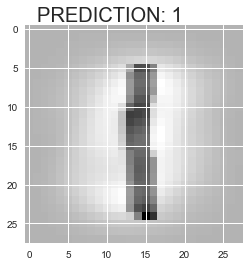

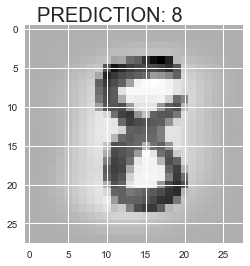

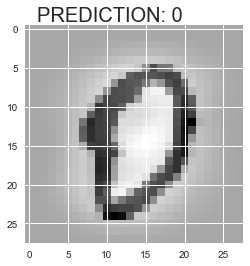

In [185]:

for i in range(3):
    ran=np.random.randint(0, test.shape[0])
    pred=model.predict(test)[ran]
    pred_digit=pred.tolist().index(max(pred))
    digit=test[ran].reshape(28,28)
    plt.imshow(digit, cmap='gray_r')
    plt.text(1, -1,"PREDICTION: {}".format(pred_digit),fontsize=20) 
    plt.show()

In [186]:
ids=[]
predictions=[]
pred=model.predict(test)
for i, values in enumerate(pred):
    pred_digit=values.tolist().index(max(values))
    ids.append(i+1)
    predictions.append(pred_digit)

In [187]:

# Make predictions
sub = pd.DataFrame({
    "ImageId": ids,
    "Label": predictions
})

sub.to_csv("submission.csv", index=False)